## Method C

Algorithm Implementation -
Select at least Two Papers and reimplement the method proposed in the papers. Let's call them Method A and Method B. 

 -  Option 1: Implement the algorithm from scratch.
 - Option 2: Use the code provided by the authors (if available) and modify or analyze it as needed.
        (Ensure your implementation can adapt to the ECG5000 dataset.)
    - Document your implementation process and any challenges faced.

Evaluation -
Evaluate the algorithm’s performance using appropriate metrics (e.g., accuracy, sensitivity, specificity).
Compare the performance of your Methods A and B with KNN (you can call it Method C).

In [6]:
# Method C based on [Capstone Project] Aim 1

from ecgLoader import load_ecg5000
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X_train, X_test, y_train, y_test = load_ecg5000()

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [8]:
acc = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.9970

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       1.00      1.00      1.00       591

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



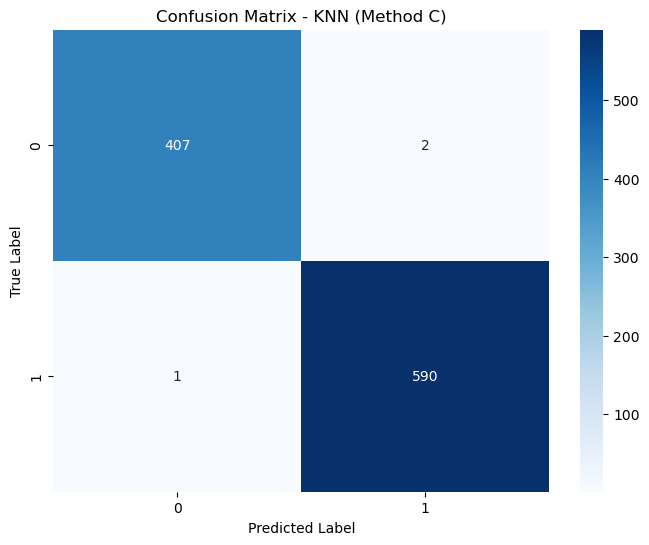

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN (Method C)")
plt.show()

## Let's try another dataset

KNN Accuracy on Heartbeat dataset: 0.9766

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18160
           1       0.89      0.70      0.78       535
           2       0.92      0.91      0.92      1402
           3       0.83      0.68      0.75       158
           4       0.99      0.97      0.98      1635

    accuracy                           0.98     21890
   macro avg       0.92      0.85      0.88     21890
weighted avg       0.98      0.98      0.98     21890



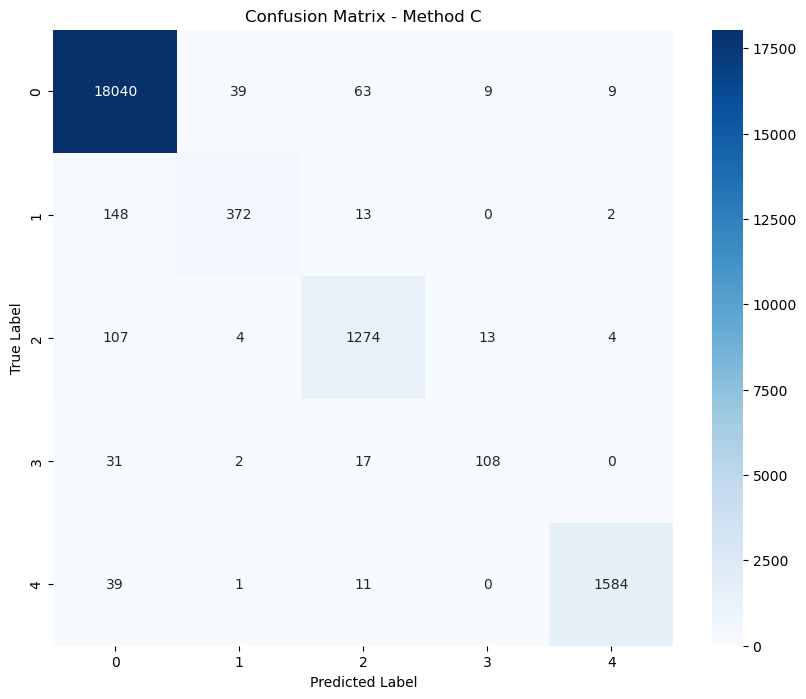

In [10]:
from ecgLoader import load_heartbeat_dataset

X_train, X_test, y_train, y_test = load_heartbeat_dataset(one_hot=True)

X_train_flat = X_train.reshape(X_train.shape[0], -1) 
X_test_flat = X_test.reshape(X_test.shape[0], -1)

if len(y_train.shape) > 1: 
    y_train_classes = np.argmax(y_train, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_train_classes = y_train
    y_test_classes = y_test

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_flat, y_train_classes)

y_pred = knn.predict(X_test_flat)

accuracy = accuracy_score(y_test_classes, y_pred)
report = classification_report(y_test_classes, y_pred)
conf_matrix = confusion_matrix(y_test_classes, y_pred)

print(f"KNN Accuracy on Heartbeat dataset: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Method C')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()